## Cleaning Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/processed/oline_merge.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,year,playername,team,age,draft_yr,draft_pos,attempts,yards_run,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,0,0,2020,Aaron Jones,GNB,26,2017,182,75,389,...,2,12,30,5.8,3.7,29.0,2,5.0,3.0,1.0
1,1,1,2019,Aaron Jones,GNB,25,2017,182,236,1084,...,3,18,67,7.0,3.1,29.6,3,5.0,13.0,6.0
2,2,2,2018,Aaron Jones,GNB,24,2017,182,133,728,...,1,12,24,5.9,2.2,17.2,1,7.0,6.0,12.0
3,3,3,2017,Aaron Jones,GNB,23,2017,7,81,448,...,0,2,9,1.2,0.8,1.8,0,5.0,13.0,2.0
4,4,4,2020,Adrian Peterson,DET,35,2007,7,80,314,...,0,3,18,4.9,1.0,7.1,0,19.0,22.0,18.0


In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'year', 'playername', 'team', 'age',
       'draft_yr', 'draft_pos', 'attempts', 'yards_run', 'tds_run',
       'longgain_run', 'yardsperatt', 'yardspergame_run',
       'basesalarycap (10^8)', 'Percenthit (%)', 'caphit (M)', 'cashspent (M)',
       'g', 'gs', 'tgt', 'rec', 'catchpercent', 'yards_rec', 'yardsperrec',
       'tds_rec', 'firstdowns', 'longgain_rec', 'yardspertarget', 'recpergame',
       'yardspergame_rec', 'fumbles', 'team_adjusted_line_yards',
       'team_running_back_yards', 'team_stuffed_rate'],
      dtype='object')

In [5]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('Unnamed: 0.1',axis=1)
data = data.drop('playername', axis=1)
data = data.drop('team', axis=1)
data = data.drop('basesalarycap (10^8)',axis=1)
data = data.drop('cashspent (M)',axis=1)
data = data.drop('caphit (M)',axis=1)
data = data.drop('catchpercent',axis=1)
data = data.drop('longgain_run',axis=1)
data = data.drop('longgain_rec',axis=1)

In [6]:
y_val = data['Percenthit (%)']

In [7]:
x_data = data.drop('Percenthit (%)',axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3)

## Scaling data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

/home/brian/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
x_train = pd.DataFrame(data=scaler.transform(x_train),
                       columns=x_train.columns,index=x_train.index)
x_test = pd.DataFrame(data=scaler.transform(x_test),
                      columns=x_test.columns,index=x_test.index)

## Creating Featuring Columns

In [14]:
data.columns

Index(['year', 'age', 'draft_yr', 'draft_pos', 'attempts', 'yards_run',
       'tds_run', 'yardsperatt', 'yardspergame_run', 'Percenthit (%)', 'g',
       'gs', 'tgt', 'rec', 'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns',
       'yardspertarget', 'recpergame', 'yardspergame_rec', 'fumbles',
       'team_adjusted_line_yards', 'team_running_back_yards',
       'team_stuffed_rate'],
      dtype='object')

In [15]:
import tensorflow as tf

In [16]:
year = tf.feature_column.numeric_column('year')
age = tf.feature_column.numeric_column('age')
draft = tf.feature_column.numeric_column('draft_yr')
pos = tf.feature_column.numeric_column('draft_pos')
attempts = tf.feature_column.numeric_column('attempts')
runyards = tf.feature_column.numeric_column('yards_run')
runtds = tf.feature_column.numeric_column('tds_run')
ypa = tf.feature_column.numeric_column('yardsperatt')
ypgrun = tf.feature_column.numeric_column('yardspergame_run')
games = tf.feature_column.numeric_column('g')
started = tf.feature_column.numeric_column('gs')
targets = tf.feature_column.numeric_column('tgt')
receptions = tf.feature_column.numeric_column('rec')
recyards = tf.feature_column.numeric_column('yards_rec')
ypr = tf.feature_column.numeric_column('yardsperrec')
rectds = tf.feature_column.numeric_column('tds_rec')
firstdown = tf.feature_column.numeric_column('firstdowns')
ypt = tf.feature_column.numeric_column('yardspertarget')
rpg = tf.feature_column.numeric_column('recpergame')
ypgrec = tf.feature_column.numeric_column('yardspergame_rec')
fum = tf.feature_column.numeric_column('fumbles')
aly = tf.feature_column.numeric_column('team_adjusted_line_yards')
rby = tf.feature_column.numeric_column('team_running_back_yards')
tsr = tf.feature_column.numeric_column('team_stuffed_rate')

In [17]:
feat_cols = [year,age,draft,attempts,runyards,runtds,ypa,ypgrun,games,started,
            targets,receptions,recyards,ypr,rectds,firstdown,ypt,rpg,ypgrec,fum,aly,rby,tsr]

In [18]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,
                                                batch_size=25,
                                                num_epochs=1000,
                                                shuffle=True)

In [19]:
model = tf.estimator.DNNRegressor(hidden_units=[512,256,128,64],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_model_dir': '/tmp/tmptlwb4tan', '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600}


In [20]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmptlwb4tan/model.ckpt.
INFO:tensorflow:loss = 385.26962, step = 1
INFO:tensorflow:global_step/sec: 378.376
INFO:tensorflow:loss = 30.912971, step = 101 (0.264 sec)
INFO:tensorflow:global_step/sec: 369.491
INFO:tensorflow:loss = 56.739353, step = 201 (0.271 sec)
INFO:tensorflow:global_step/sec: 405.615
INFO:tensorflow:loss = 80.250404, step = 301 (0.246 sec)
INFO:tensorflow:global_step/sec: 414.513
INFO:tensorflow:loss = 43.971573, step = 401 (0.241 sec)
INFO:tensorflow:global_step/sec: 405.049
INFO:tensorflow:loss = 23.970499, step = 501 (0.247 sec)
INFO:tensorflow:global_step/sec: 390.583
INFO:tensorflow:loss = 19.04675, step = 601 (0.256 sec)
INFO:tensorflow:global_step/sec: 390.281
INFO:tensorflow:loss = 41.494503, step = 701 (0.256 sec)
INFO:tensorflow:global_step/sec: 405.761
INFO:tensorflow:loss = 27.966074, step = 801 (0.247 sec)
INFO:tensorflow:global_step/sec: 421.701
INFO:tensorflo

INFO:tensorflow:global_step/sec: 398.294
INFO:tensorflow:loss = 0.04281571, step = 8201 (0.251 sec)
INFO:tensorflow:global_step/sec: 373.517
INFO:tensorflow:loss = 0.04673431, step = 8301 (0.268 sec)
INFO:tensorflow:global_step/sec: 386.836
INFO:tensorflow:loss = 0.2419513, step = 8401 (0.259 sec)
INFO:tensorflow:global_step/sec: 393.179
INFO:tensorflow:loss = 0.08895874, step = 8501 (0.254 sec)
INFO:tensorflow:global_step/sec: 403.975
INFO:tensorflow:loss = 0.05221424, step = 8601 (0.248 sec)
INFO:tensorflow:global_step/sec: 383.358
INFO:tensorflow:loss = 0.17318666, step = 8701 (0.261 sec)
INFO:tensorflow:global_step/sec: 402.47
INFO:tensorflow:loss = 0.18381469, step = 8801 (0.248 sec)
INFO:tensorflow:global_step/sec: 395.292
INFO:tensorflow:loss = 0.11651592, step = 8901 (0.253 sec)
INFO:tensorflow:global_step/sec: 392.684
INFO:tensorflow:loss = 0.068250425, step = 9001 (0.254 sec)
INFO:tensorflow:global_step/sec: 398.017
INFO:tensorflow:loss = 0.031191448, step = 9101 (0.251 sec)


INFO:tensorflow:global_step/sec: 408.167
INFO:tensorflow:loss = 0.0019030011, step = 16301 (0.245 sec)
INFO:tensorflow:global_step/sec: 408.561
INFO:tensorflow:loss = 0.005141087, step = 16401 (0.245 sec)
INFO:tensorflow:Saving checkpoints for 16440 into /tmp/tmptlwb4tan/model.ckpt.
INFO:tensorflow:Loss for final step: 0.011226299.


In [21]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                        batch_size=25,
                                                        num_epochs=1,
                                                        shuffle=False)

In [22]:
pred_gen = model.predict(predict_input_func)

In [23]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from /tmp/tmptlwb4tan/model.ckpt-16440


In [24]:
predictions

[{'predictions': array([1.6449763], dtype=float32)},
 {'predictions': array([0.6988754], dtype=float32)},
 {'predictions': array([1.8188121], dtype=float32)},
 {'predictions': array([1.7692829], dtype=float32)},
 {'predictions': array([0.7297127], dtype=float32)},
 {'predictions': array([2.4046147], dtype=float32)},
 {'predictions': array([0.213892], dtype=float32)},
 {'predictions': array([4.494569], dtype=float32)},
 {'predictions': array([3.1167467], dtype=float32)},
 {'predictions': array([1.3943473], dtype=float32)},
 {'predictions': array([2.2187269], dtype=float32)},
 {'predictions': array([1.1070293], dtype=float32)},
 {'predictions': array([0.6910337], dtype=float32)},
 {'predictions': array([1.082772], dtype=float32)},
 {'predictions': array([0.2666186], dtype=float32)},
 {'predictions': array([3.6982393], dtype=float32)},
 {'predictions': array([1.8594959], dtype=float32)},
 {'predictions': array([4.1837134], dtype=float32)},
 {'predictions': array([0.63567364], dtype=float3

In [25]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['predictions'])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test,final_preds)**0.5

1.5572868456545612

In [28]:
y_test.head(n=20)

32     0.376524
257    0.448763
307    0.394604
282    3.447368
416    0.351552
174    2.433691
49     0.401053
118    2.790448
413    0.475589
96     0.646676
354    1.128668
539    0.750441
287    1.288793
337    1.161013
81     0.290546
531    1.112385
224    3.008130
227    1.158537
485    0.411543
261    0.373674
Name: Percenthit (%), dtype: float64

In [29]:
final_preds

[array([1.6449763], dtype=float32),
 array([0.6988754], dtype=float32),
 array([1.8188121], dtype=float32),
 array([1.7692829], dtype=float32),
 array([0.7297127], dtype=float32),
 array([2.4046147], dtype=float32),
 array([0.213892], dtype=float32),
 array([4.494569], dtype=float32),
 array([3.1167467], dtype=float32),
 array([1.3943473], dtype=float32),
 array([2.2187269], dtype=float32),
 array([1.1070293], dtype=float32),
 array([0.6910337], dtype=float32),
 array([1.082772], dtype=float32),
 array([0.2666186], dtype=float32),
 array([3.6982393], dtype=float32),
 array([1.8594959], dtype=float32),
 array([4.1837134], dtype=float32),
 array([0.63567364], dtype=float32),
 array([1.1861564], dtype=float32),
 array([1.3256203], dtype=float32),
 array([0.23370492], dtype=float32),
 array([0.2840855], dtype=float32),
 array([0.27703092], dtype=float32),
 array([0.9176121], dtype=float32),
 array([3.2263114], dtype=float32),
 array([1.9084774], dtype=float32),
 array([0.27639887], dtype=f

In [30]:
from sklearn.metrics import explained_variance_score

In [31]:
explained_variance_score(y_test, final_preds)

0.44438731343399485

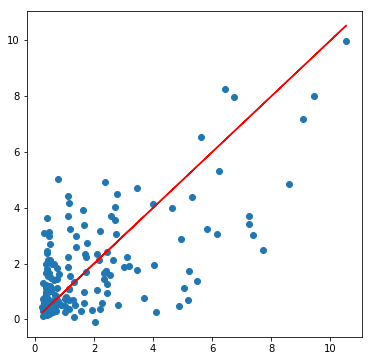

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,final_preds)
plt.plot(y_test,y_test,'r')